https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

In [47]:
def plot_combined(combinedDf1, combinedDf2):
    f, axs = plt.subplots(1,2,figsize = (15,5))

    a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
    b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_pop_studenti.png')

    
    f, axs = plt.subplots(2,2,figsize = (15,15))

    a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
    b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

    d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
    e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)

    e.set_xticklabels(d.get_xticklabels(), rotation=90)
    d.set_xticklabels(e.get_xticklabels(), rotation=90)


    plt.tight_layout()
    plt.show()
    f.savefig('plot_aree_genere.png')
    
    
    f, axs = plt.subplots(1,3,figsize = (15,5))
    a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
    b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
    c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)
    c.set_xticklabels(c.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_att_pop_age1.png')
    
    f, axs = plt.subplots(1,3,figsize = (15,5))
    a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
    b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
    c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)
    c.set_xticklabels(c.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_att_pop_age2.png')


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)

In [2]:
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)

In [3]:
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

In [4]:
gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

In [5]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

In [6]:
gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()

## 2 cluster

In [7]:
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 142, cost: 5458.0
Run 1, iteration: 2/100, moves: 69, cost: 5458.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 826.0


In [8]:
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

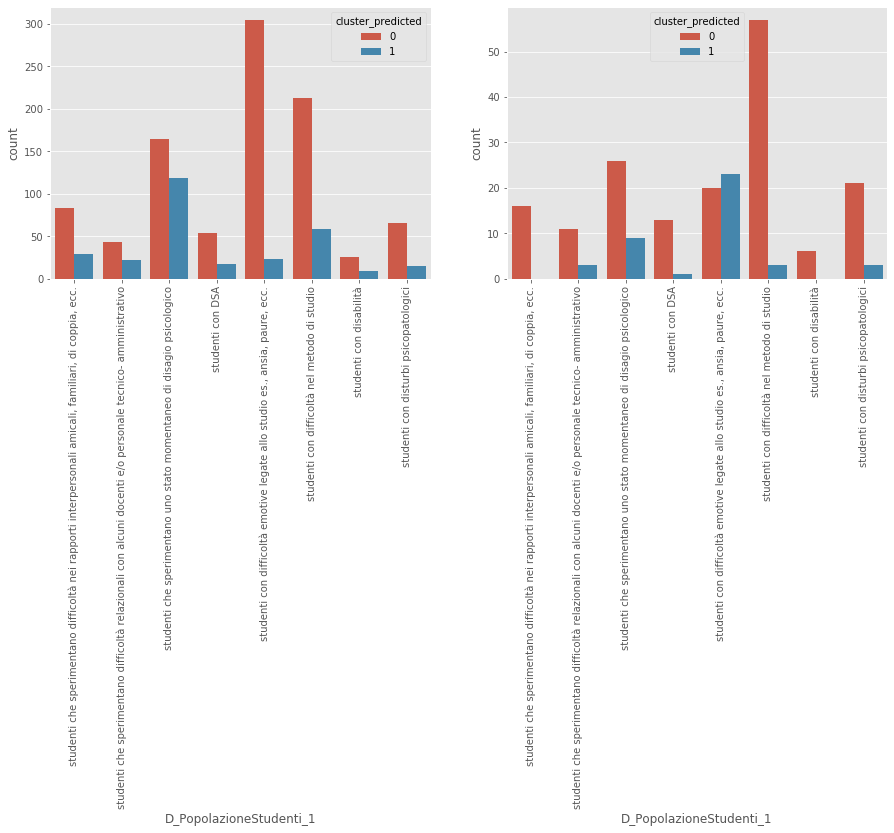

In [9]:
f, axs = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

plt.show()

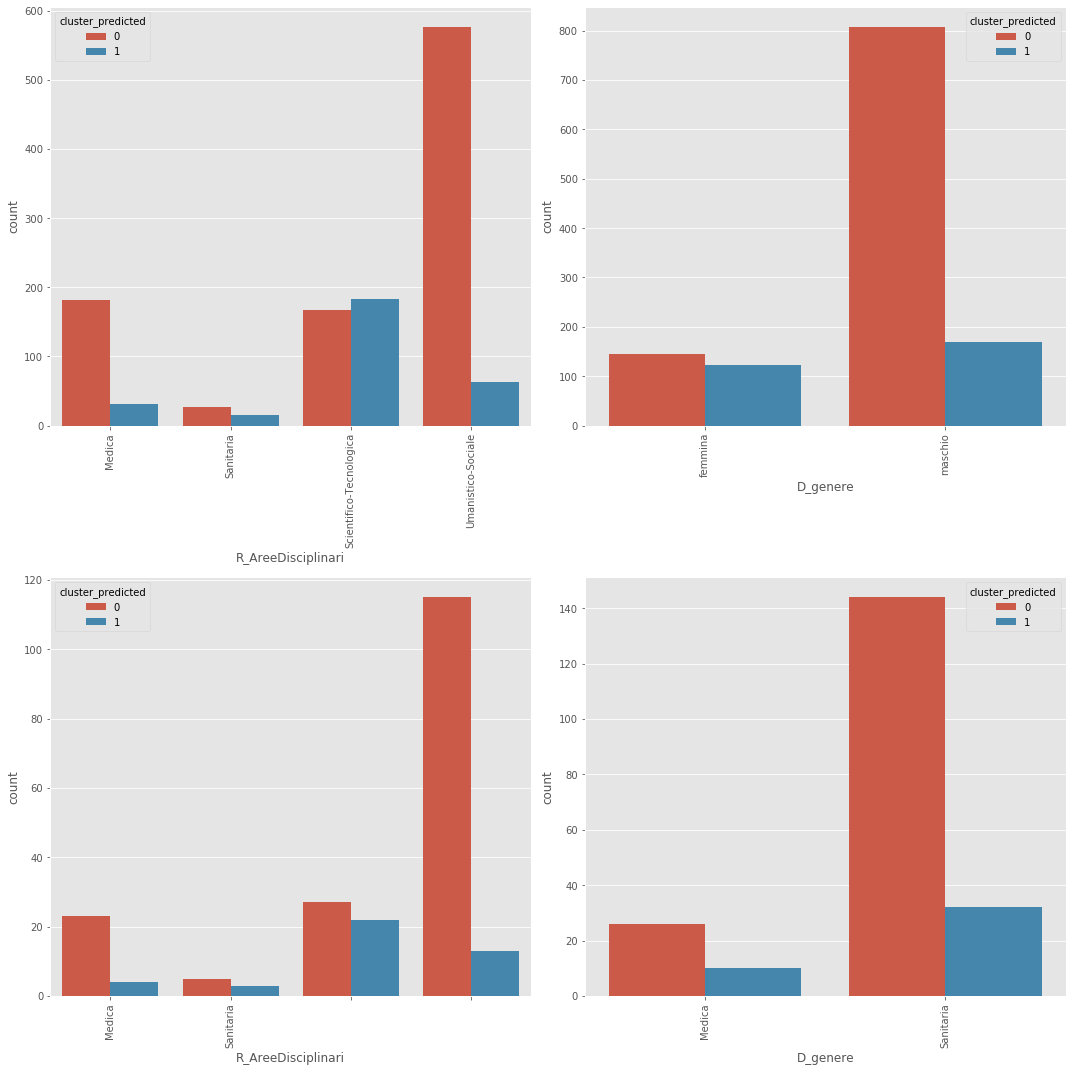

In [10]:
f, axs = plt.subplots(2,2,figsize = (15,15))

a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

e.set_xticklabels(d.get_xticklabels(), rotation=90)
d.set_xticklabels(e.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


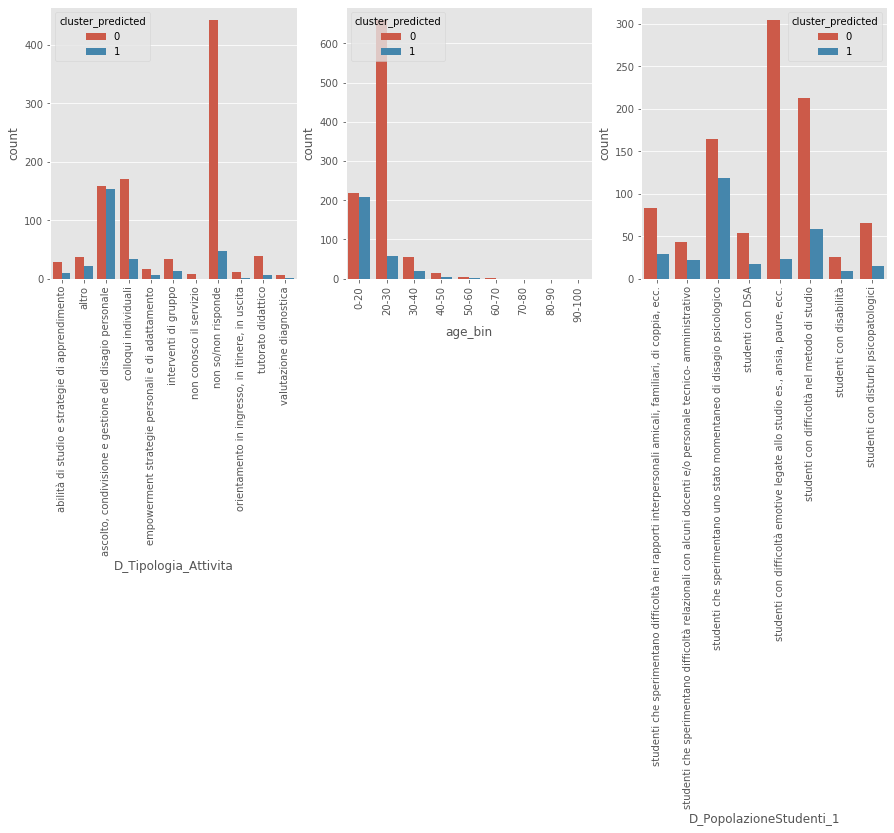

In [11]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

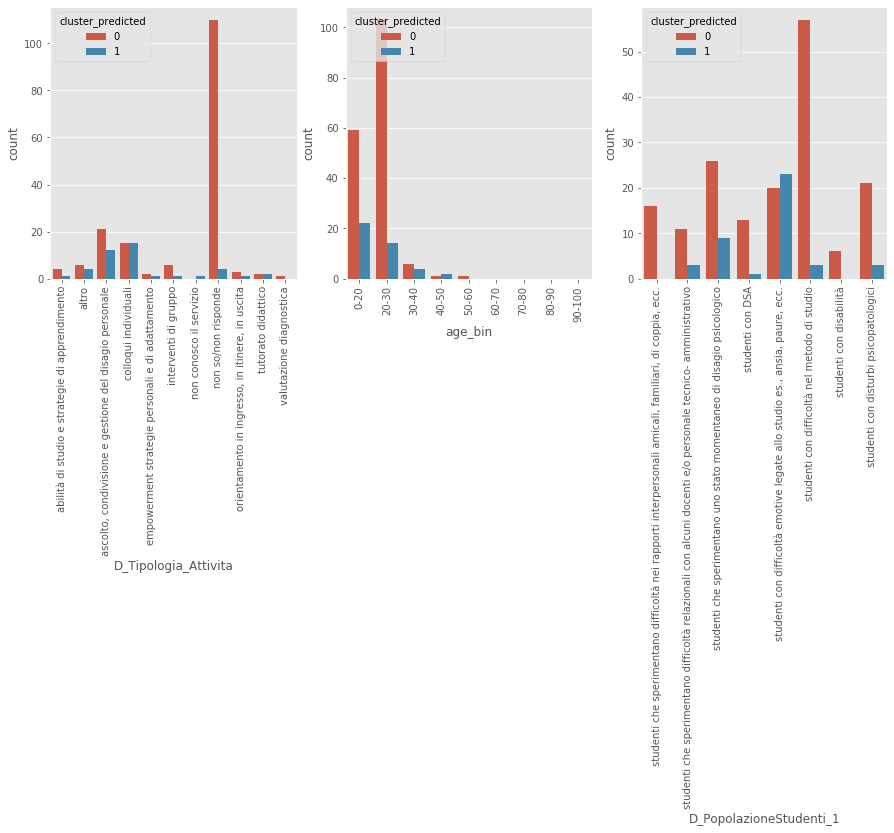

In [12]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

---

## Same analysis 5 clusters

In [45]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()


In [46]:
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 4456.0
Run 1, iteration: 2/100, moves: 151, cost: 4455.0
Run 1, iteration: 3/100, moves: 0, cost: 4455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 688.0
Run 1, iteration: 2/100, moves: 3, cost: 687.0
Run 1, iteration: 3/100, moves: 0, cost: 687.0


In [47]:
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

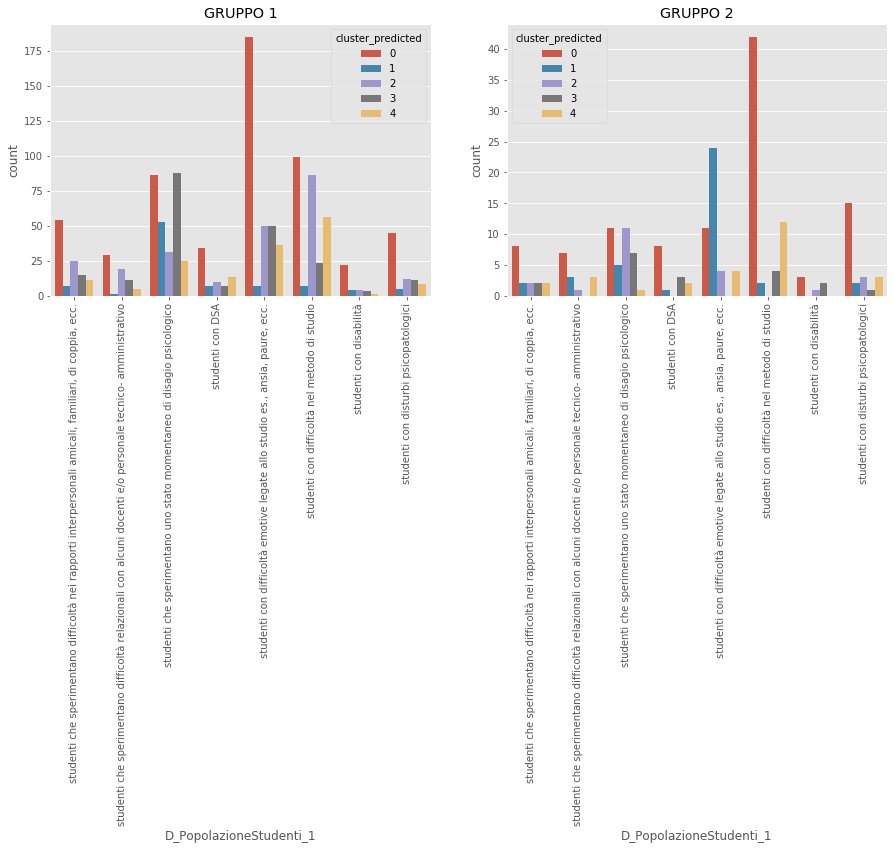

In [48]:
f, axs = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

a.set_title("GRUPPO 1")
b.set_title("GRUPPO 2")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

plt.show()

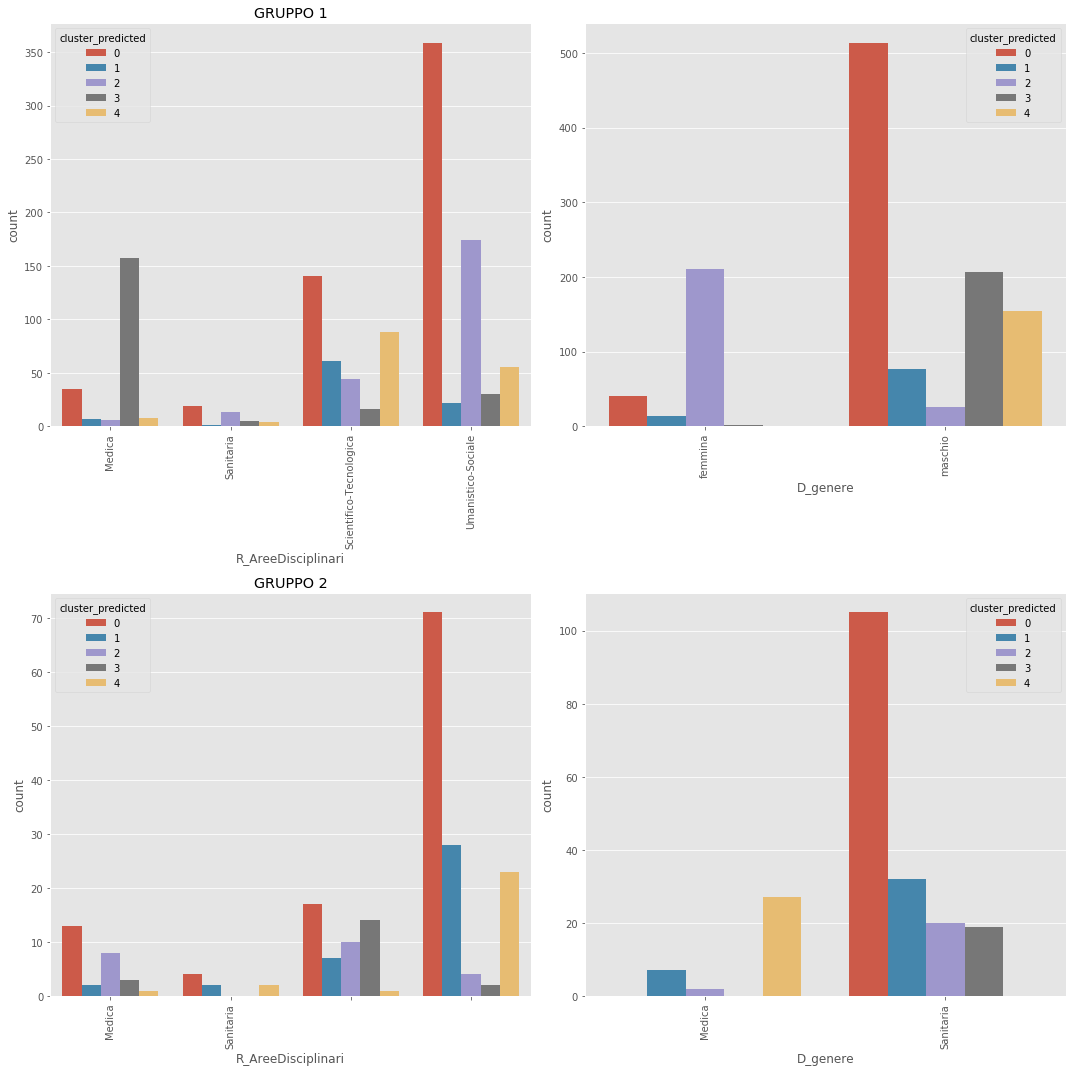

In [49]:
f, axs = plt.subplots(2,2,figsize = (15,15))

a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


a.set_title("GRUPPO 1")
d.set_title("GRUPPO 2")


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

e.set_xticklabels(d.get_xticklabels(), rotation=90)
d.set_xticklabels(e.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


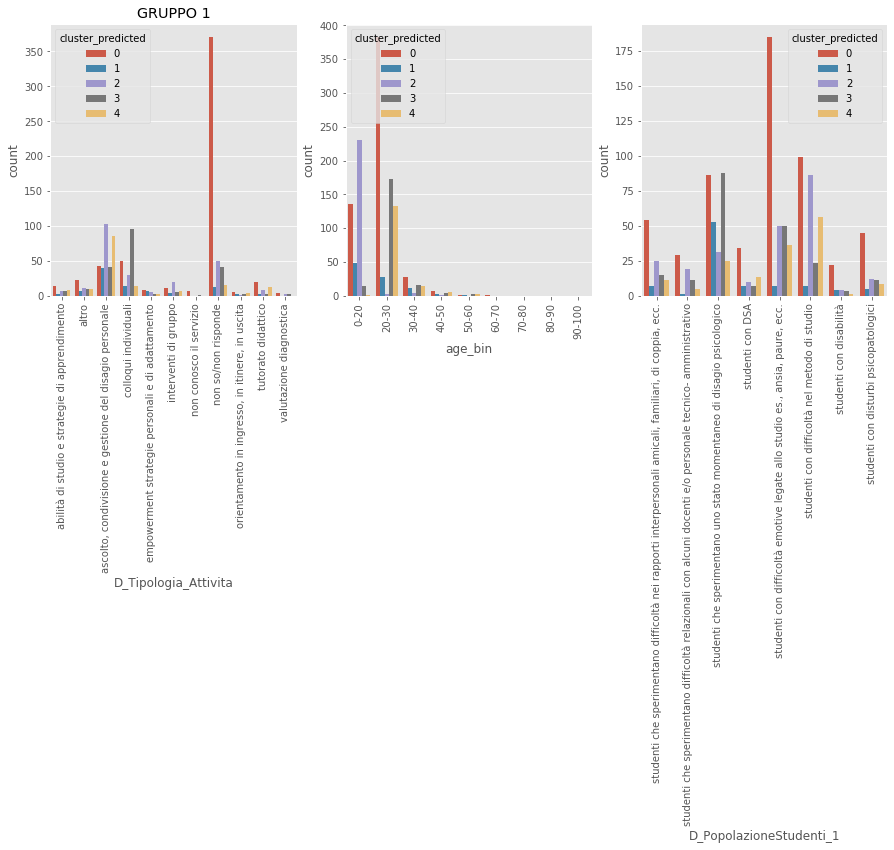

In [50]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])

a.set_title("GRUPPO 1")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

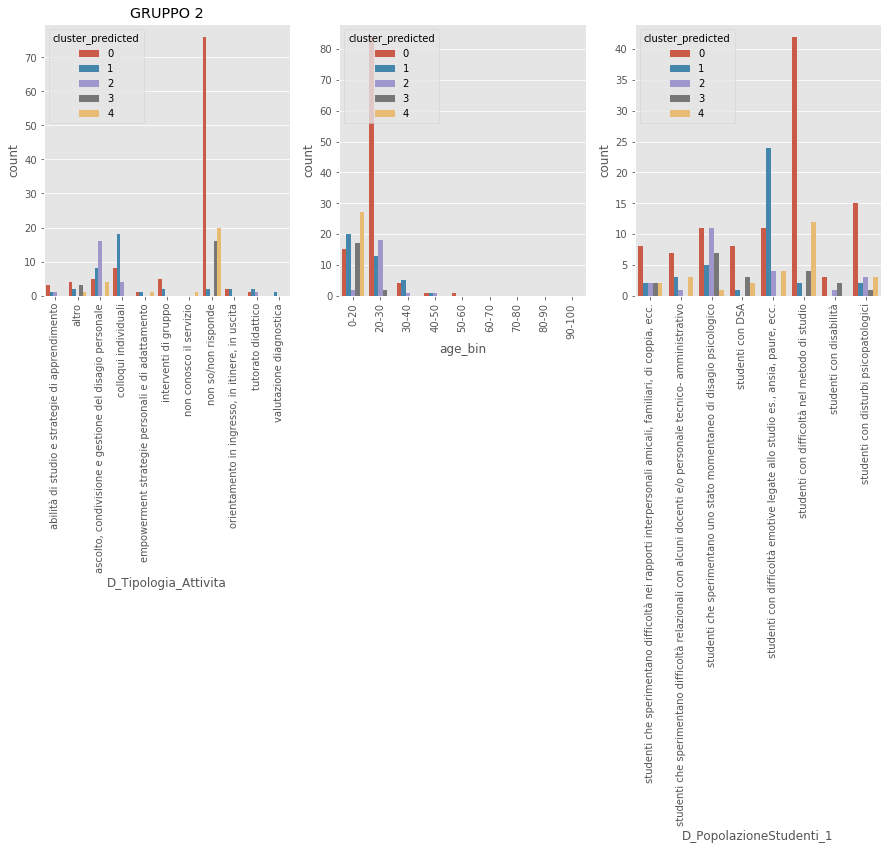

In [51]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])

a.set_title("GRUPPO 2")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

----

## change age bin - 5 cluster

In [52]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 
                              labels=['0-15', '15-20', '20-25', '25-30','30-35', '35-40','40-45', '45-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 
                              labels=['0-15', '15-20', '20-25', '25-30','30-35', '35-40','40-45', '45-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 160, cost: 4785.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 731.0
Run 1, iteration: 2/100, moves: 15, cost: 719.0
Run 1, iteration: 3/100, moves: 10, cost: 719.0


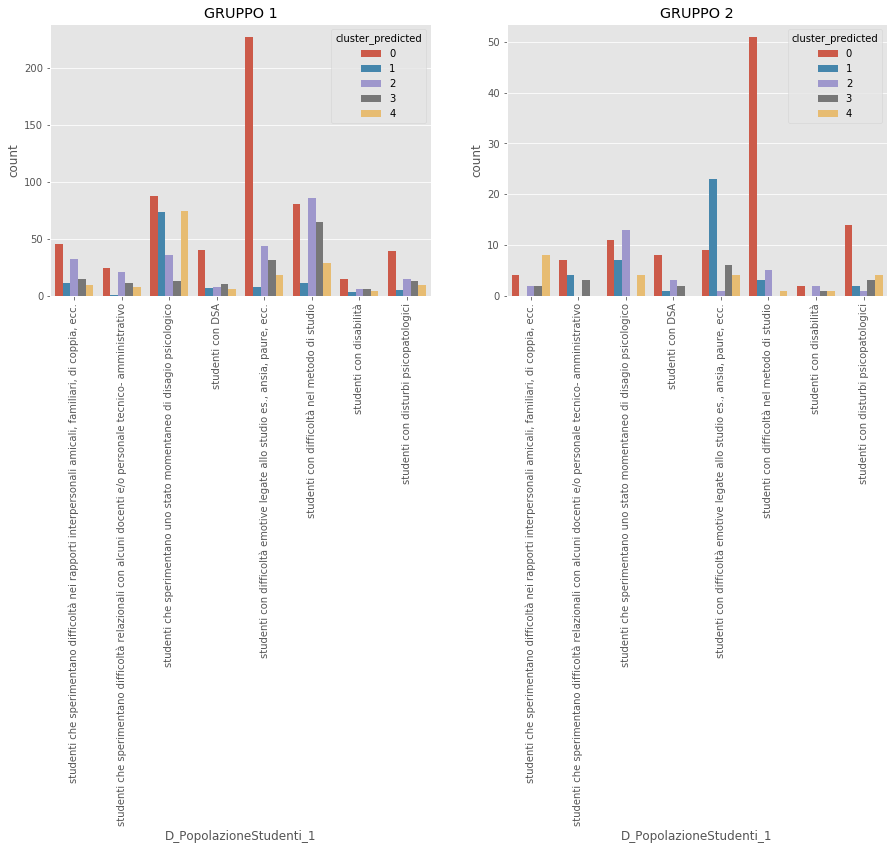

In [53]:
f, axs = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

a.set_title("GRUPPO 1")
b.set_title("GRUPPO 2")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

plt.show()

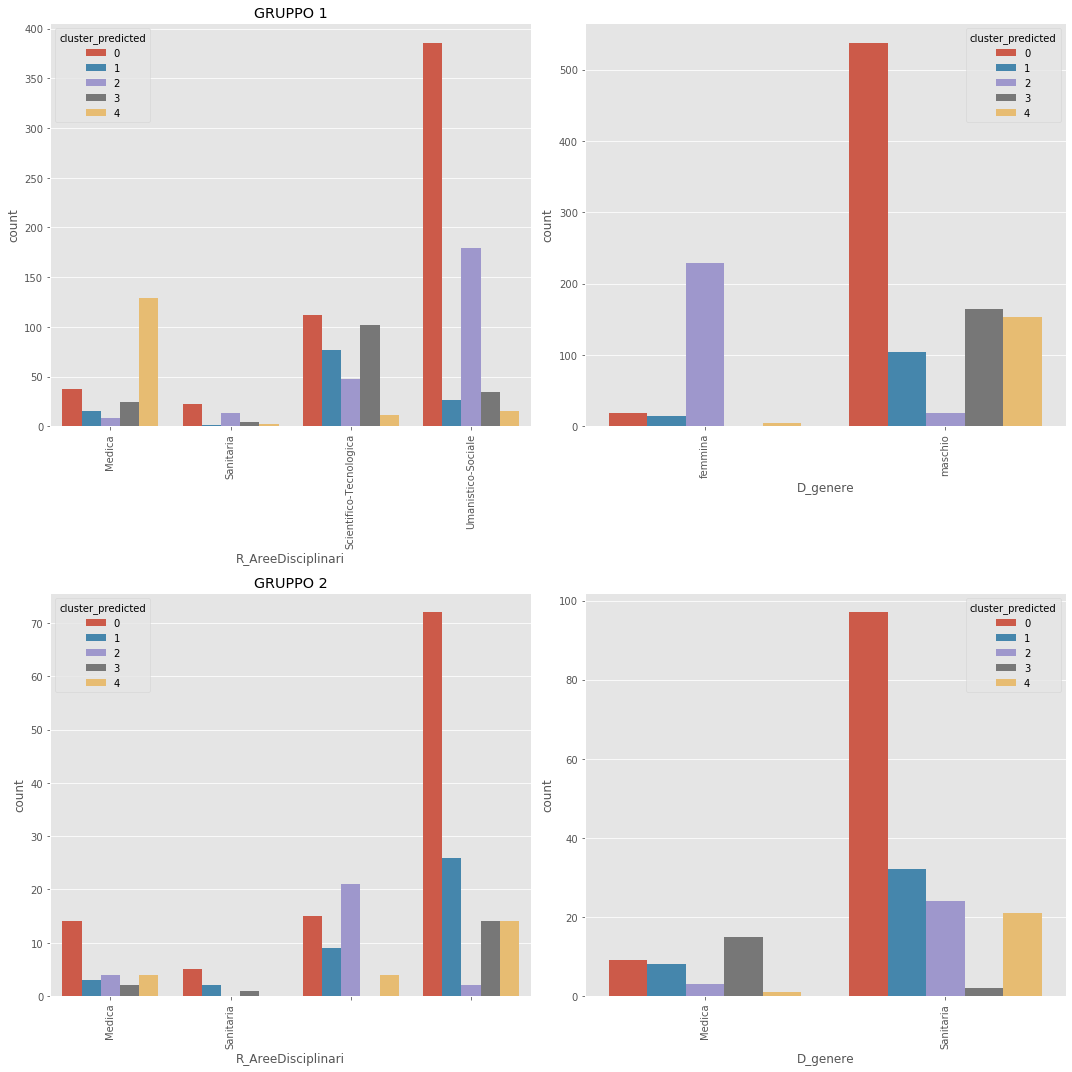

In [54]:
f, axs = plt.subplots(2,2,figsize = (15,15))

a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


a.set_title("GRUPPO 1")
d.set_title("GRUPPO 2")


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

e.set_xticklabels(d.get_xticklabels(), rotation=90)
d.set_xticklabels(e.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

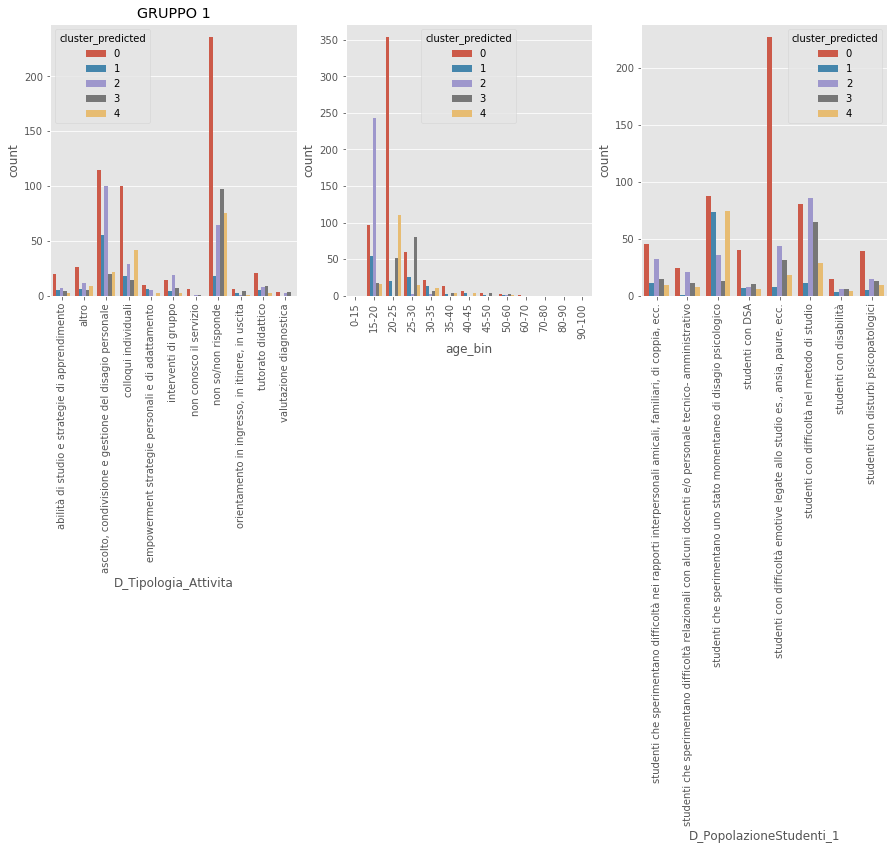

In [55]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])

a.set_title("GRUPPO 1")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

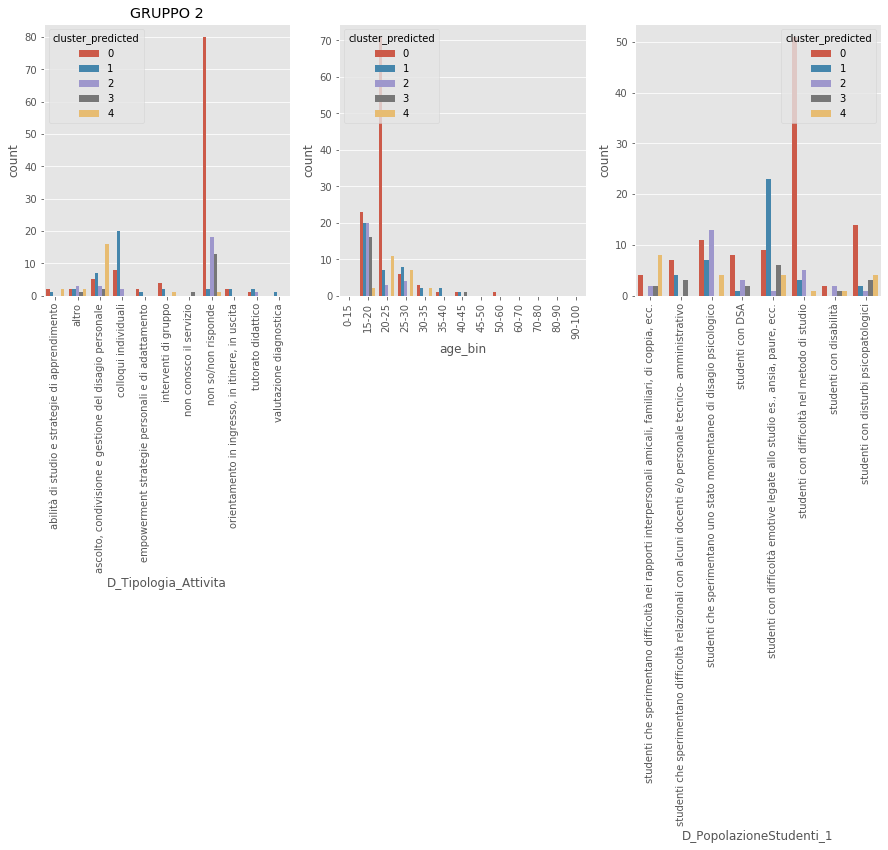

In [56]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])

a.set_title("GRUPPO 2")

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

---

### MCA Multiple Correspondence Analysis

In [139]:
import prince
mca = prince.MCA()
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline

In [140]:
mca = mca.fit(gruppo_1.values)
mca = mca.transform(gruppo_1.values)

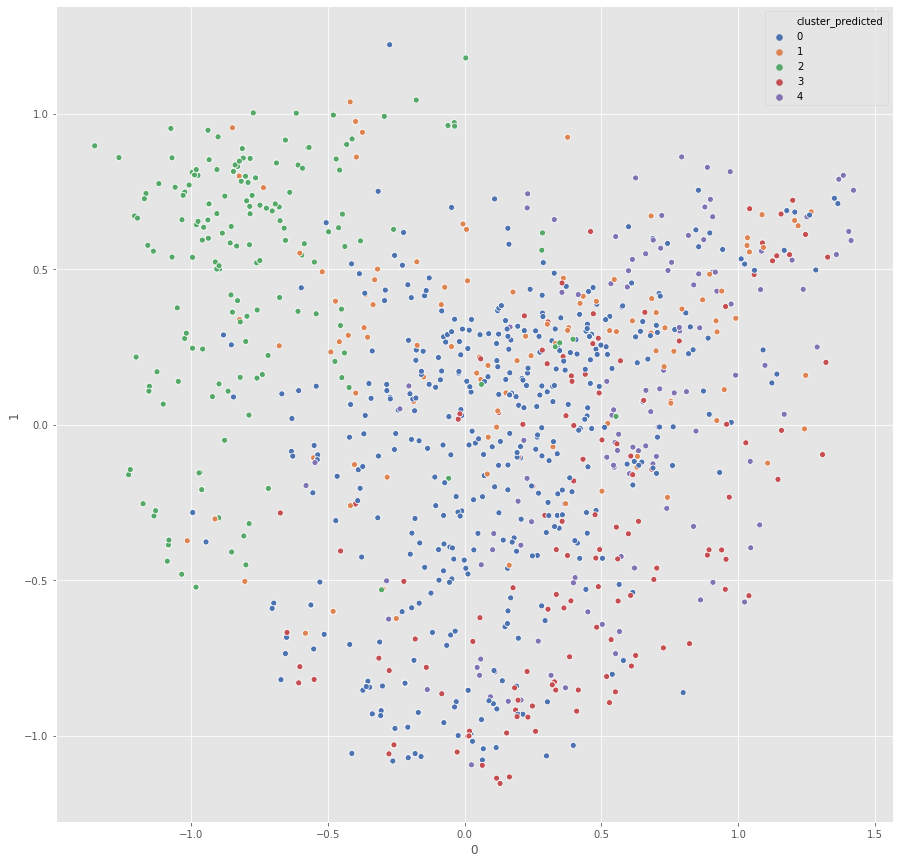

In [141]:
f, axs = plt.subplots(figsize = (15,15))
ax = sns.scatterplot(x=mca.loc[:,0], y=mca.loc[:,1], hue=combinedDf1['cluster_predicted'], palette="deep")

In [137]:
combinedDf1['cluster_predicted'].value_counts()

0    557
2    248
3    164
4    157
1    119
Name: cluster_predicted, dtype: int64

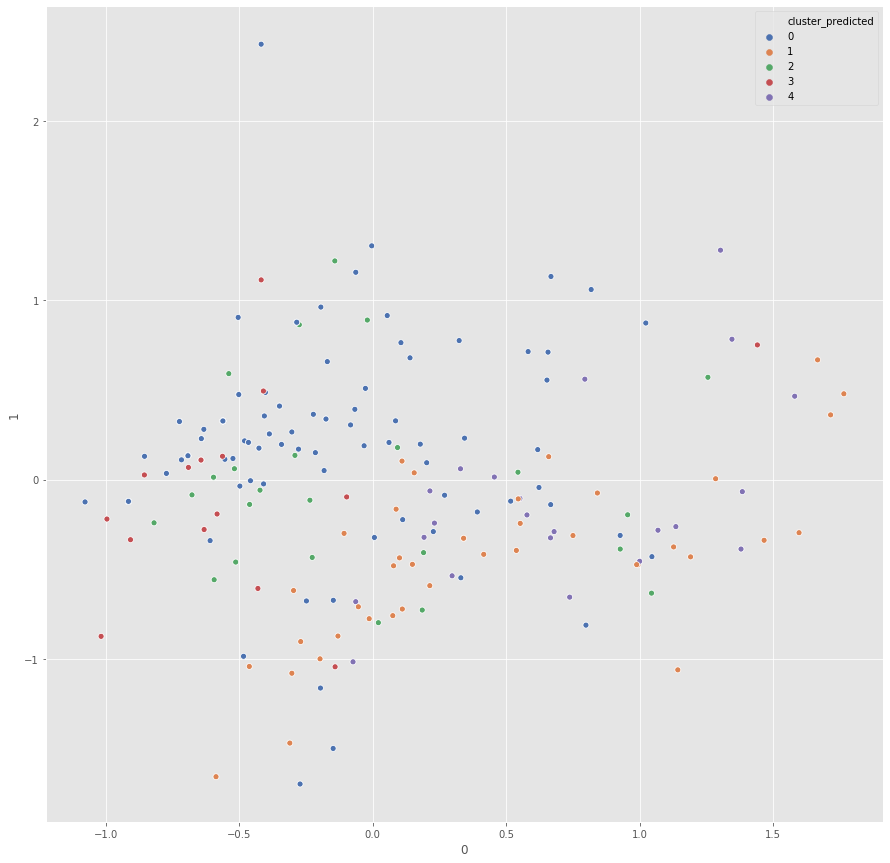

In [138]:
mca = prince.MCA()
mca = mca.fit(gruppo_2.values)
mca = mca.transform(gruppo_2.values)
f, axs = plt.subplots(figsize = (15,15))
ax = sns.scatterplot(x=mca.loc[:,0], y=mca.loc[:,1], hue=combinedDf2['cluster_predicted'], palette="deep")

For n_clusters = 2 The average silhouette_score is : 0.38367918760712666
For n_clusters = 3 The average silhouette_score is : 0.452691843720287
For n_clusters = 4 The average silhouette_score is : 0.4065820405581057
For n_clusters = 5 The average silhouette_score is : 0.41253450015772763
For n_clusters = 6 The average silhouette_score is : 0.42792728154983584


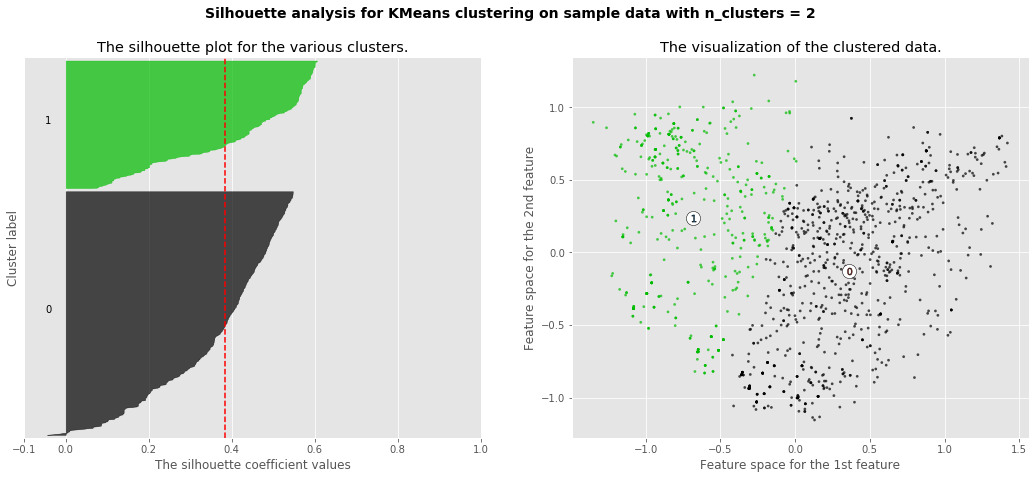

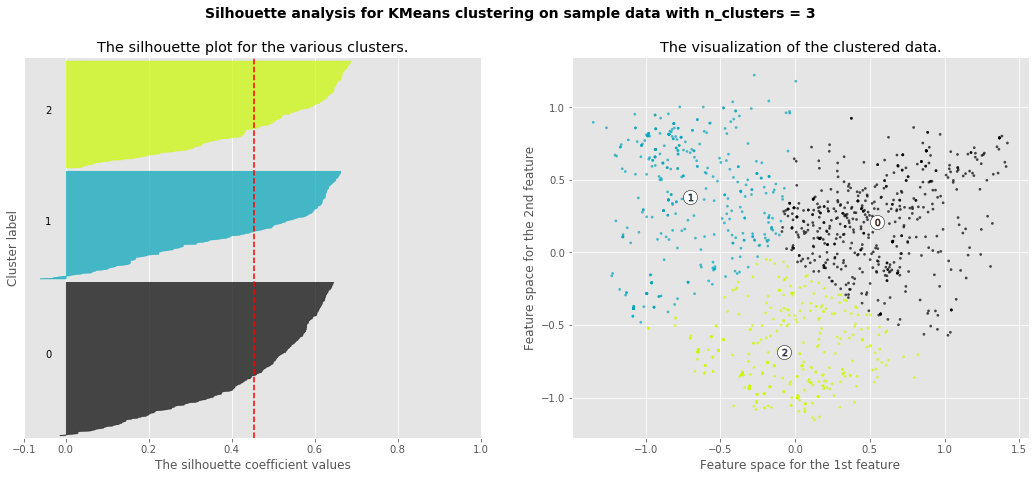

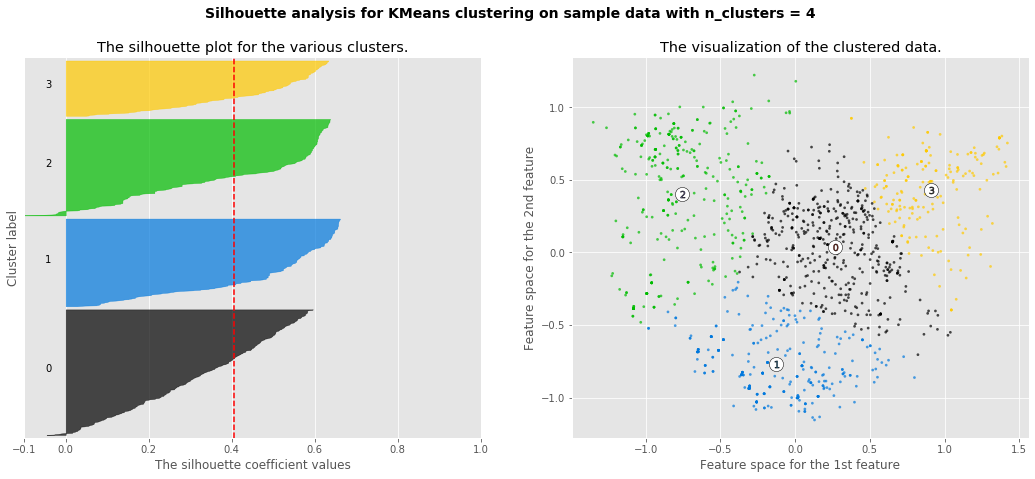

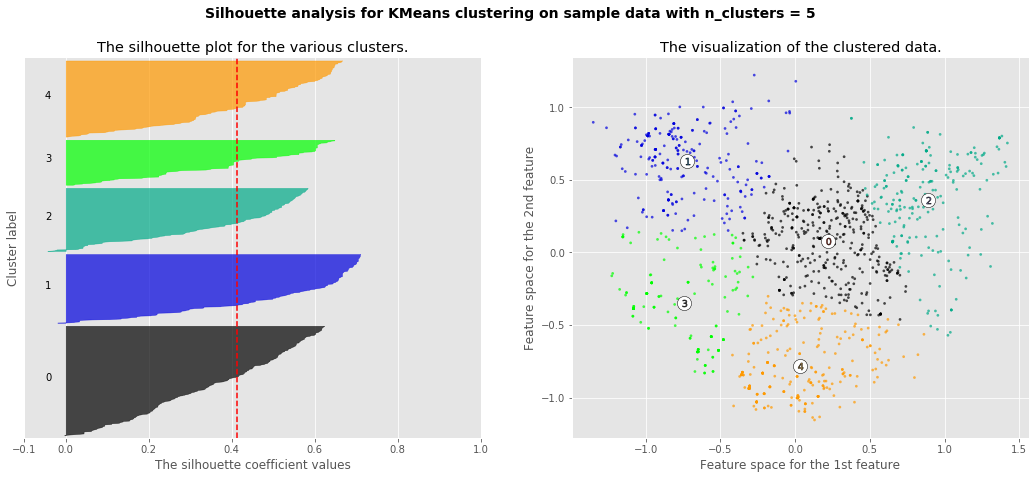

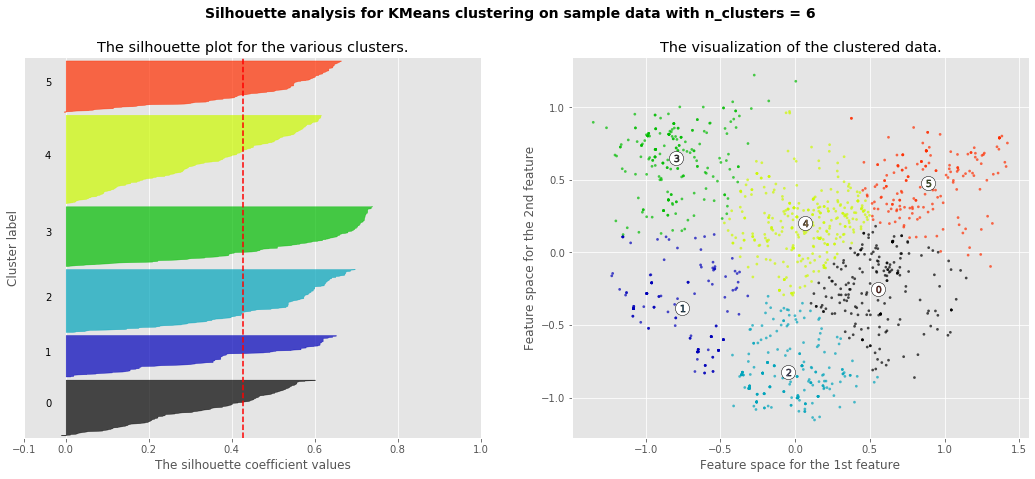

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
X=mca.values
y=combinedDf1['cluster_predicted']
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()